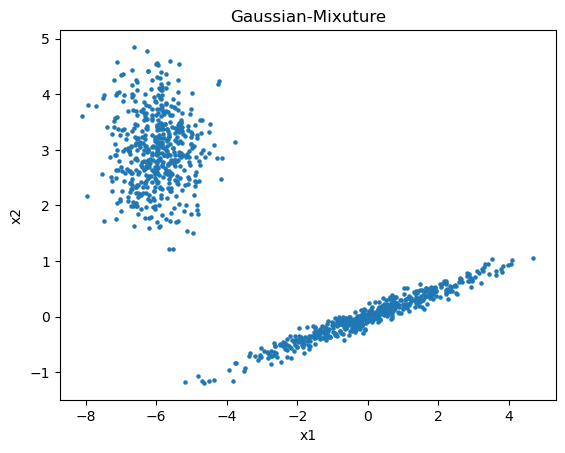

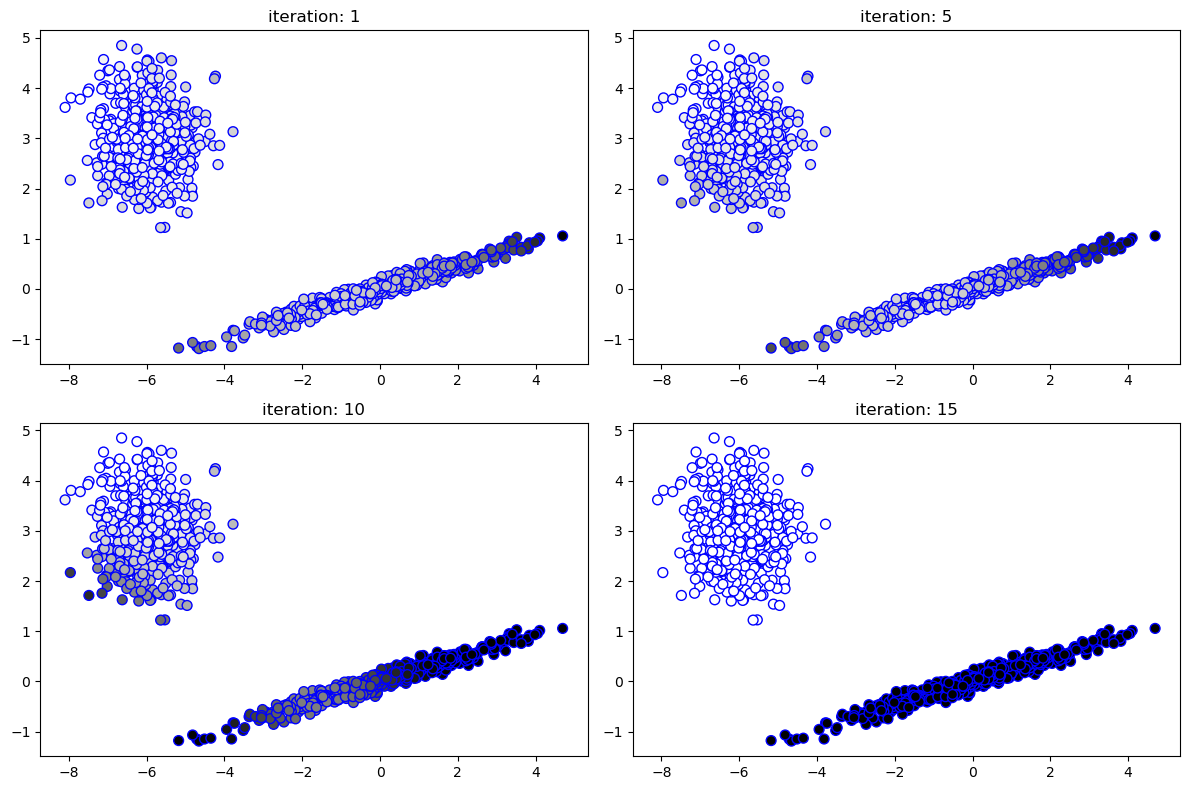

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

from sklearn.mixture import GaussianMixture
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

n_samples = 500

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2]
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Gaussian-Mixuture")
plt.show()

def plot_gaussianmixture(n):
    model = GaussianMixture(n_components=2, init_params='random', random_state=0, tol=1e-9, max_iter=n)
    with ignore_warnings(category=ConvergenceWarning):
        model.fit(X)
    pi = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=pi[:, 0])
    plt.title("iteration: {}".format(n))

plt.figure(figsize=(12, 8))
plt.subplot(221)
plot_gaussianmixture(1)
plt.subplot(222)
plot_gaussianmixture(5)
plt.subplot(223)
plot_gaussianmixture(10)
plt.subplot(224)
plot_gaussianmixture(15)
plt.tight_layout()
plt.show()